# Imports

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Background

We want to generate random numbers according to a given *probability density function* $f(x)$. If we generate random numbers using the PDF's *cumulative distribution function*, the random numbers' density will match the PDF.

This is because the probability density function is related to the cumulative distribution function by 

$$ f(x) = \frac{dF(x)}{dx} $$

The steeper the curve *F* is, the more points will be distributed there.

# Problem statement

We want to generate random numbers according to the distribution $f(x) = x^2$ in the range (0, 2), using a number of different random number distributions.

We want to generate random numbers in *f*'s distribution using uniform random random numbers in any range (0, *k*).

In order to do so, we need to compute the cumulative distribution functions of both U(0, *k*) and $f$. 

Given a random number $x_2$ generated in the uniform distribution *G*, we want to figure out which number in the (0, 2) range it maps to, 

Two different CDFs, *F* and *G*, can be equal at two different points $x_1$ and $x_2$:

$$
F(x_1) = G(x_2)
$$

We can find $x_1$:

$$
x_1 = F^-1(G(x_2))
$$



# The CDFs

The CDF of $ f(x) $ is 

$$
F(x)=\int_{0}^{x} {x^{\prime}}^{2} \mathrm{d}x^{\prime} = C\frac{x^3}{3}
$$

We can find the scaling factor by using the fact that $F(2)=1$:

$$
C \frac{2^3}{3} = 1
$$

Thus, we obtain

$$
F(x) = \frac{1}{8} x^3
$$

$$
F^{-1}(x) = (8x)^{\frac{1}{3}}
$$

The PDF of a uniform distribution is a constant function, so the cumulative distribution function is

$$
G(x) = \int_{0}^{x} c\mathrm{d}x^{\prime} = cx
$$

We can find the normalization constant by using the fact that $G(k) = 1$:

$$
ck=1
$$

So we obtain

$$
G(x) = \frac{1}{k}x
$$

In [3]:
# Preliminaries

rng = np.random.default_rng()

(array([   7.,    9.,   18.,   34.,   48.,   47.,   68.,   91.,  109.,
         136.,  136.,  191.,  215.,  238.,  293.,  332.,  356.,  422.,
         412.,  461.,  516.,  516.,  594.,  678.,  757.,  805.,  878.,
         908.,  986., 1076., 1138., 1217., 1271., 1302., 1394., 1513.,
        1569., 1709., 1772., 1859., 2043., 2002., 2101., 2191., 2354.,
        2459., 2556., 2702., 2706., 2805.]),
 array([0.05860074, 0.0974287 , 0.13625665, 0.1750846 , 0.21391255,
        0.2527405 , 0.29156846, 0.33039641, 0.36922436, 0.40805231,
        0.44688026, 0.48570821, 0.52453617, 0.56336412, 0.60219207,
        0.64102002, 0.67984797, 0.71867592, 0.75750388, 0.79633183,
        0.83515978, 0.87398773, 0.91281568, 0.95164364, 0.99047159,
        1.02929954, 1.06812749, 1.10695544, 1.14578339, 1.18461135,
        1.2234393 , 1.26226725, 1.3010952 , 1.33992315, 1.3787511 ,
        1.41757906, 1.45640701, 1.49523496, 1.53406291, 1.57289086,
        1.61171882, 1.65054677, 1.68937472, 1.72820267, 

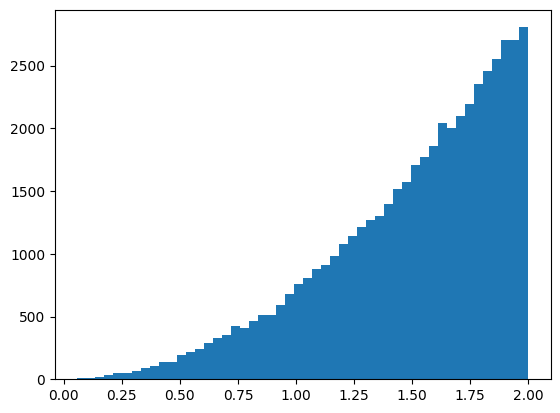

In [4]:
u1 = rng.uniform(0, 1, 50000)
# G(x) = x
f1 = np.array([(8.0 * x) ** (1.0 / 3.0) for x in u1])

plt.hist(f1, bins=50)

(array([  10.,   15.,   15.,   31.,   42.,   53.,   91.,   80.,  108.,
         125.,  130.,  167.,  206.,  237.,  278.,  324.,  369.,  373.,
         455.,  486.,  567.,  598.,  659.,  698.,  691.,  813.,  893.,
         886., 1008.,  999., 1153., 1178., 1239., 1361., 1365., 1472.,
        1576., 1601., 1816., 1880., 1913., 2048., 2167., 2276., 2337.,
        2382., 2606., 2701., 2686., 2836.]),
 array([0.06159624, 0.10036428, 0.13913231, 0.17790034, 0.21666837,
        0.25543641, 0.29420444, 0.33297247, 0.3717405 , 0.41050854,
        0.44927657, 0.4880446 , 0.52681264, 0.56558067, 0.6043487 ,
        0.64311673, 0.68188477, 0.7206528 , 0.75942083, 0.79818886,
        0.8369569 , 0.87572493, 0.91449296, 0.95326099, 0.99202903,
        1.03079706, 1.06956509, 1.10833313, 1.14710116, 1.18586919,
        1.22463722, 1.26340526, 1.30217329, 1.34094132, 1.37970935,
        1.41847739, 1.45724542, 1.49601345, 1.53478148, 1.57354952,
        1.61231755, 1.65108558, 1.68985362, 1.72862165, 

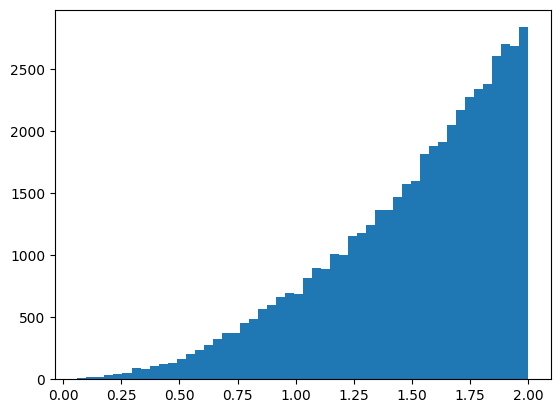

In [5]:
u2 = rng.uniform(0, 10, 50000)
# G(x) = 0.5 * x
f2 = np.array([(8.0 * (0.1 * x)) ** (1.0 / 3.0) for x in u2])

plt.hist(f2, bins=50)

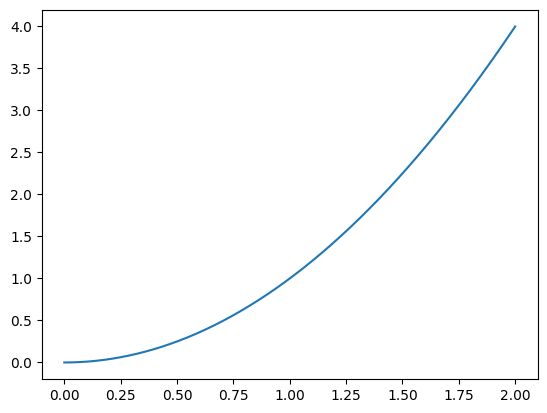

In [6]:
# Preliminaries

x = np.linspace(0, 2, 1000)
y = np.array([x*x for x in x])

plt.plot(x, y)

Let's generate random numbers in the normal distribution and see the histogram, as well as what the random numbers look like when the CDF is applied.

(array([  2.,   0.,   3.,   1.,   1.,   2.,   9.,  17.,  21.,  39.,  35.,
         60.,  75.,  81., 151., 187., 220., 275., 332., 372., 460., 467.,
        565., 567., 610., 610., 577., 602., 532., 507., 480., 423., 359.,
        284., 250., 225., 157., 121., 104.,  77.,  51.,  35.,  16.,  14.,
          7.,   7.,   5.,   2.,   1.,   2.]),
 array([-3.95505121, -3.80168972, -3.64832824, -3.49496675, -3.34160527,
        -3.18824378, -3.0348823 , -2.88152081, -2.72815933, -2.57479784,
        -2.42143636, -2.26807487, -2.11471339, -1.9613519 , -1.80799042,
        -1.65462893, -1.50126744, -1.34790596, -1.19454447, -1.04118299,
        -0.8878215 , -0.73446002, -0.58109853, -0.42773705, -0.27437556,
        -0.12101408,  0.03234741,  0.18570889,  0.33907038,  0.49243186,
         0.64579335,  0.79915483,  0.95251632,  1.1058778 ,  1.25923929,
         1.41260077,  1.56596226,  1.71932374,  1.87268523,  2.02604671,
         2.1794082 ,  2.33276968,  2.48613117,  2.63949265,  2.79285414,
 

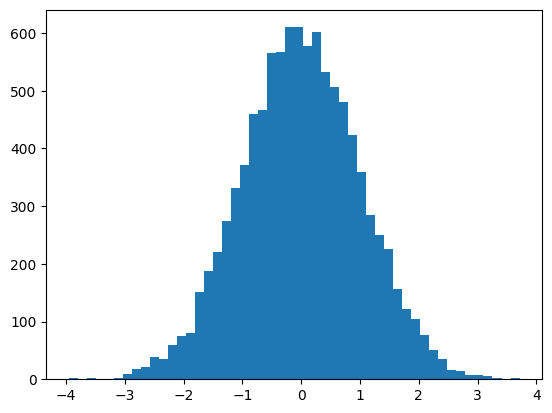

In [8]:
n = rng.normal(loc=0.0, scale=1.0, size=10000)
plt.hist(n, bins=50)

(array([217., 173., 225., 205., 186., 224., 193., 198., 193., 219., 215.,
        179., 184., 194., 213., 207., 223., 173., 196., 213., 217., 178.,
        188., 224., 192., 209., 193., 181., 173., 213., 200., 215., 167.,
        212., 177., 206., 198., 209., 197., 200., 198., 215., 203., 191.,
        174., 205., 221., 192., 222., 200.]),
 array([3.82591303e-05, 2.00354460e-02, 4.00326328e-02, 6.00298196e-02,
        8.00270065e-02, 1.00024193e-01, 1.20021380e-01, 1.40018567e-01,
        1.60015754e-01, 1.80012941e-01, 2.00010127e-01, 2.20007314e-01,
        2.40004501e-01, 2.60001688e-01, 2.79998875e-01, 2.99996062e-01,
        3.19993248e-01, 3.39990435e-01, 3.59987622e-01, 3.79984809e-01,
        3.99981996e-01, 4.19979183e-01, 4.39976370e-01, 4.59973556e-01,
        4.79970743e-01, 4.99967930e-01, 5.19965117e-01, 5.39962304e-01,
        5.59959491e-01, 5.79956677e-01, 5.99953864e-01, 6.19951051e-01,
        6.39948238e-01, 6.59945425e-01, 6.79942612e-01, 6.99939798e-01,
        7.

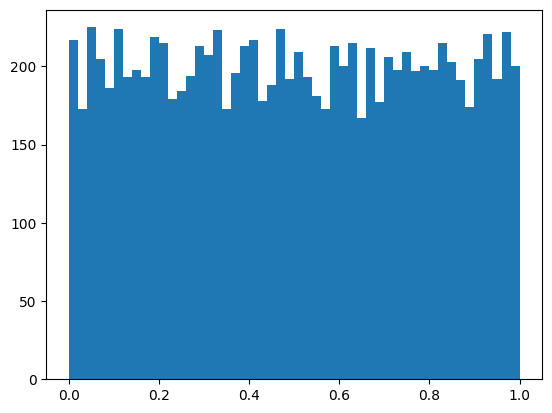

In [12]:
n_cdf = np.array([0.5 * (1.0 + math.erf(x / (math.sqrt(2.0)))) for x in n])
plt.hist(n_cdf, bins=50)

Thus we can see that applying the CDF to the random numbers in a given distribution undoes the density distribution. We can now generate random numbers distributed as x^2 using normally distributed random numbers.

(array([  3.,   3.,   1.,   3.,   9.,  17.,  18.,  28.,  27.,  21.,  41.,
         29.,  45.,  51.,  42.,  53.,  94.,  90.,  88., 103.,  92., 124.,
        113., 162., 149., 155., 158., 187., 227., 206., 219., 216., 259.,
        280., 294., 292., 345., 318., 353., 379., 350., 391., 423., 434.,
        447., 493., 521., 505., 561., 581.]),
 array([0.067392  , 0.1060428 , 0.14469359, 0.18334439, 0.22199518,
        0.26064598, 0.29929677, 0.33794756, 0.37659836, 0.41524915,
        0.45389995, 0.49255074, 0.53120154, 0.56985233, 0.60850313,
        0.64715392, 0.68580472, 0.72445551, 0.7631063 , 0.8017571 ,
        0.84040789, 0.87905869, 0.91770948, 0.95636028, 0.99501107,
        1.03366187, 1.07231266, 1.11096346, 1.14961425, 1.18826505,
        1.22691584, 1.26556663, 1.30421743, 1.34286822, 1.38151902,
        1.42016981, 1.45882061, 1.4974714 , 1.5361222 , 1.57477299,
        1.61342379, 1.65207458, 1.69072537, 1.72937617, 1.76802696,
        1.80667776, 1.84532855, 1.88397935, 1.

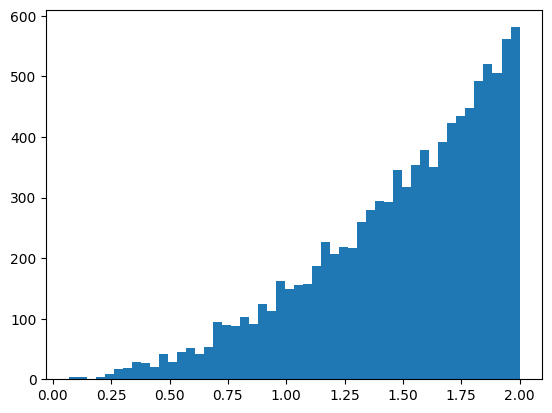

In [14]:
# And here, we finally generate x^2 distributed random numbers using normally distributed random numbers.
f3 = np.array([(8.0 * (0.5 * (1.0 + math.erf(x / math.sqrt(2.0))))) ** (1.0 / 3.0) for x in n])
plt.hist(f3, bins=50)